In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:

# Read the city and ride data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df, how="left", on=["city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [5]:
#get sum for total rides, total drivers, total fares
pyber_total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
pyber_total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
pyber_total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
pyber_total_fares       


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#get average fare per ride and average fare per driver
pyber_average_fares_ride=pyber_total_fares/pyber_total_rides
pyber_average_fares_driver=pyber_total_fares/pyber_total_drivers
pyber_average_fares_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [7]:
#combine all the elements

pyber_summary_df=pd.DataFrame({"Total Rides":pyber_total_rides, "Total Drivers":pyber_total_drivers,
                           "Total Fares":pyber_total_fares,"Average Fare per Ride":pyber_average_fares_ride, 
                           "Average Fare per Driver":pyber_average_fares_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [8]:
# Delete index name

pyber_summary_df.index.name=""
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
# Format the summary dataframe
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"] .map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"] .map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"] .map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"] .map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"] .map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [10]:
#Rename columns
pyber_data_df=pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 
                                             'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df.head()


,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [11]:
#Set Date as index
pyber_data_df=pyber_data_df.set_index(["Date"])
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban


In [12]:
#Get specific columns
pyber_data_df_copy=pyber_data_df[["City Type", "Fare"]].copy()
pyber_data_df_copy.head()

,City Type,Fare
Date,,
1/14/2019 10:14,Urban,13.83
3/4/2019 18:24,Urban,30.24
2/24/2019 4:29,Urban,33.44
2/10/2019 23:22,Urban,23.44
3/6/2019 4:28,Urban,34.58


In [13]:
pyber_data_df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 1/14/2019 10:14 to 4/25/2019 10:20
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [14]:
#Set index to datetime data type
pyber_data_df_copy.index=pd.to_datetime(pyber_data_df_copy.index)
pyber_data_df_copy.head()

,City Type,Fare
Date,,
2019-01-14 10:14:00,Urban,13.83
2019-03-04 18:24:00,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:00,Urban,23.44
2019-03-06 04:28:00,Urban,34.58


In [15]:
pyber_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [16]:
#Sum fares for type of city and date
pyber_fares_Urban=pyber_data_df_copy.loc[pyber_data_df_copy["City Type"]=="Urban"]
pyber_fares_Urban_fare=pyber_fares_Urban.groupby(["Date"]).sum()["Fare"]
pyber_fares_Urban_fare.head()

Date
2019-01-01 00:08:00    37.91
2019-01-01 03:46:00     7.57
2019-01-01 05:23:00    10.75
2019-01-01 14:40:00     5.42
2019-01-01 14:42:00    12.31
Name: Fare, dtype: float64

In [17]:
pyber_fares_Rural=pyber_data_df_copy.loc[pyber_data_df_copy["City Type"]=="Rural"]
pyber_fares_Rural_fare=pyber_fares_Rural.groupby(["Date"]).sum()["Fare"]
pyber_fares_Suburban=pyber_data_df_copy.loc[pyber_data_df_copy["City Type"]=="Suburban"]
pyber_fares_Suburban_fare=pyber_fares_Suburban.groupby(["Date"]).sum()["Fare"]
pyber_fares_Suburban_fare.head()

Date
2019-01-01 00:46:00    47.74
2019-01-01 02:07:00    24.07
2019-01-01 12:32:00    25.56
2019-01-01 14:52:00    31.15
2019-01-02 00:13:00    44.71
Name: Fare, dtype: float64

In [18]:
pyber_fares_city_fare=pd.DataFrame({"Rural":pyber_fares_Rural_fare, "Suburban":pyber_fares_Suburban_fare,
                                    "Urban":pyber_fares_Urban_fare})
pyber_fares_city_fare.head(10)

,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [19]:
pyber_fares_city_fare_2019_0104=pyber_fares_city_fare.loc['2019-01-01':'2019-04-28']
pyber_fares_city_fare_2019_0104.tail()

,Rural,Suburban,Urban
Date,,,
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43
2019-04-28 17:38:00,NaN,34.87,NaN
2019-04-28 19:35:00,NaN,16.96,NaN


In [20]:
#Using resample to sum with week
pyber_fares_city_fare_week=pyber_fares_city_fare_2019_0104.resample("1W").sum()
pyber_fares_city_fare_week.head()

,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [21]:
# Import mpl to change style
import matplotlib as mpl
import numpy as np

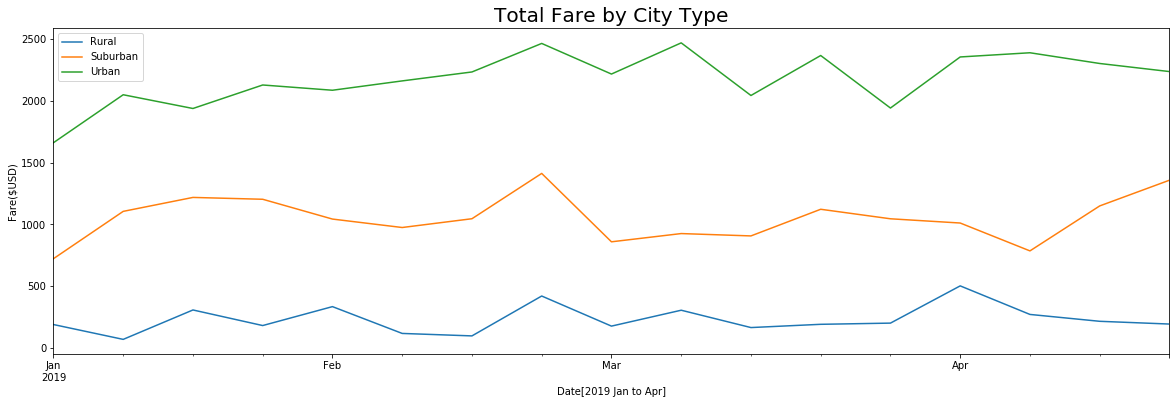

In [22]:

pyber_fares_city_fare_week.plot(figsize=(20, 6))
plt.style.use('fivethirtyeight')
plt.title("Total Fare by City Type")
plt.xlabel("Date[2019 Jan to Apr]")
plt.ylabel("Fare($USD)")
# Save Figure
plt.savefig("analysis/Total Fare by City Type.png")
# Show Figure
plt.show()